In [1]:
%matplotlib inline
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point, Polygon
import folium
import os

In [2]:
# Data taken from https://data.winnipeg.ca/Transit/Transit-On-Time-Performance-Data-Archive/cymk-nyei
may_2019_transit_ontime_data = pd.read_csv("on_time_performance_2019_05.csv")

In [3]:
may_2019_transit_ontime_data

,Row ID,Stop Number,Route Number,Route Name,Route Destination,Day Type,Scheduled Time,Deviation,Location
0,415221142,50534,55,St. Anne's,U of Winnipeg via Dakota,Weekday,2019-05-06T09:45:55,113,POINT (-97.100985959698 49.8516212398491)
1,415221144,50536,55,St. Anne's,U of Winnipeg via Dakota,Weekday,2019-05-06T09:46:22,105,POINT (-97.1018466864093 49.8527327447882)
2,415221146,50538,55,St. Anne's,U of Winnipeg via Dakota,Weekday,2019-05-06T09:47:00,71,POINT (-97.1029529643399 49.8543250035057)
3,415221148,50540,55,St. Anne's,U of Winnipeg via Dakota,Weekday,2019-05-06T09:47:31,85,POINT (-97.1039318827746 49.8556183288162)
4,415221150,50541,55,St. Anne's,U of Winnipeg via Dakota,Weekday,2019-05-06T09:48:16,88,POINT (-97.1054737483094 49.8574605555685)
5,415221152,50544,55,St. Anne's,U of Winnipeg via Dakota,Weekday,2019-05-06T09:49:05,88,POINT (-97.1070104597507 49.859437602993)
6,415221154,50546,55,St. Anne's,U of Winnipeg via Dakota,Weekday,2019-05-06T09:49:38,103,POINT (-97.1080427515696 49.8607947289828)
7,415221156,50547,55,St. Anne's,U of Winnipeg via Dakota,Weekday,2019-05-06T09:50:05,116,POINT (-97.1089173538657 49.8619153998825)
8,415221158,50549,55,St. Anne's,U of Winnipeg via Dakota,Weekday,2019-05-06T09:50:38,129,POINT (-97.1099508029985 49.8632455414647)
9,415221160,50284,55,St. Anne's,U of Winnipeg via Dakota,Weekday,2019-05-06T09:51:00,97,POINT (-97.1105974956756 49.8641465997555)


In [4]:
may_2019_transit_ontime_data['Scheduled Time'] = pd.to_datetime(may_2019_transit_ontime_data['Scheduled Time'], format='%Y-%m-%dT%H:%M:%S')

In [5]:
may_2019_transit_ontime_data['Deviation (Minutes)'] = may_2019_transit_ontime_data['Deviation'] / 60

In [6]:
may_2019_transit_ontime_data

,Row ID,Stop Number,Route Number,Route Name,Route Destination,Day Type,Scheduled Time,Deviation,Location,Deviation (Minutes)
0,415221142,50534,55,St. Anne's,U of Winnipeg via Dakota,Weekday,2019-05-06 09:45:55,113,POINT (-97.100985959698 49.8516212398491),1.883333
1,415221144,50536,55,St. Anne's,U of Winnipeg via Dakota,Weekday,2019-05-06 09:46:22,105,POINT (-97.1018466864093 49.8527327447882),1.750000
2,415221146,50538,55,St. Anne's,U of Winnipeg via Dakota,Weekday,2019-05-06 09:47:00,71,POINT (-97.1029529643399 49.8543250035057),1.183333
3,415221148,50540,55,St. Anne's,U of Winnipeg via Dakota,Weekday,2019-05-06 09:47:31,85,POINT (-97.1039318827746 49.8556183288162),1.416667
4,415221150,50541,55,St. Anne's,U of Winnipeg via Dakota,Weekday,2019-05-06 09:48:16,88,POINT (-97.1054737483094 49.8574605555685),1.466667
5,415221152,50544,55,St. Anne's,U of Winnipeg via Dakota,Weekday,2019-05-06 09:49:05,88,POINT (-97.1070104597507 49.859437602993),1.466667
6,415221154,50546,55,St. Anne's,U of Winnipeg via Dakota,Weekday,2019-05-06 09:49:38,103,POINT (-97.1080427515696 49.8607947289828),1.716667
7,415221156,50547,55,St. Anne's,U of Winnipeg via Dakota,Weekday,2019-05-06 09:50:05,116,POINT (-97.1089173538657 49.8619153998825),1.933333
8,415221158,50549,55,St. Anne's,U of Winnipeg via Dakota,Weekday,2019-05-06 09:50:38,129,POINT (-97.1099508029985 49.8632455414647),2.150000
9,415221160,50284,55,St. Anne's,U of Winnipeg via Dakota,Weekday,2019-05-06 09:51:00,97,POINT (-97.1105974956756 49.8641465997555),1.616667


In [7]:
def generate_transit_ontime_geodataframe(transit_ontime_data):
    assert 'Location' in transit_ontime_data.columns
    list_of_lat_long_strings = list(transit_ontime_data.Location)
    list_of_lat_long_tuples_string = [ tuple(x[x.find('(')+1:-1].split(' ')) for x in list_of_lat_long_strings]
    list_of_lat_long_tuples = [ (float(x[1]), float(x[0])) for x in list_of_lat_long_tuples_string]
    geometry = [Point(xy) for xy in list_of_lat_long_tuples]
    transit_ontime_data = transit_ontime_data.drop(['Location'], axis=1)
    crs = {'init': 'epsg:4326'}
    transit_ontime_data = gpd.GeoDataFrame(transit_ontime_data, crs=crs, geometry=geometry)
    return transit_ontime_data

### Average Deviation by Transit Stop / Location

In [8]:
may_2019_ontime_deviation_avg_by_stop = may_2019_transit_ontime_data.groupby(['Stop Number', 'Location']).mean()[['Deviation', 'Deviation (Minutes)']].reset_index()

In [9]:
may_2019_ontime_deviation_avg_by_stop = generate_transit_ontime_geodataframe(may_2019_ontime_deviation_avg_by_stop)

In [10]:
may_2019_ontime_deviation_avg_by_stop

,Stop Number,Deviation,Deviation (Minutes),geometry
0,10001,-148.224589,-2.470410,POINT (49.8712708144224 -97.1395184826704)
1,10002,-148.135616,-2.468927,POINT (49.8688285668439 -97.13755263749979)
2,10003,-178.923632,-2.982061,POINT (49.8678899066177 -97.1367954989073)
3,10004,-174.407297,-2.906788,POINT (49.8665321325783 -97.1357066182215)
4,10005,-225.346854,-3.755781,POINT (49.8651741248688 -97.13460389068879)
5,10006,-193.643493,-3.227392,POINT (49.8632603566523 -97.133063441269)
6,10007,-190.923729,-3.182062,POINT (49.8610730727844 -97.13129711518781)
7,10008,-214.332910,-3.572215,POINT (49.8598251418871 -97.13032952392049)
8,10009,-235.574291,-3.926238,POINT (49.8578083934142 -97.1285429394792)
9,10010,-134.785430,-2.246424,POINT (49.8633549799757 -97.1177808339898)


In [11]:
# Ensure there are no stops that are given multiple location points (shouldn't happen)
assert len(may_2019_ontime_deviation_avg_by_stop.drop_duplicates('Stop Number')) == len(may_2019_ontime_deviation_avg_by_stop)

In [12]:
may_2019_ontime_deviation_avg_by_stop.sort_values('Deviation')

,Stop Number,Deviation,Deviation (Minutes),geometry
4947,61002,-738.666667,-12.311111,POINT (49.8417339986562 -97.1919906919708)
4007,50964,-733.575499,-12.226258,POINT (49.8145305040322 -97.076762603822)
4008,50965,-726.312500,-12.105208,POINT (49.8157007267045 -97.0778978485741)
4645,60635,-720.968750,-12.016146,POINT (49.8425660756466 -97.1894003574851)
3879,50828,-702.899441,-11.714991,POINT (49.8084496379391 -97.0936275092717)
3998,50954,-699.212291,-11.653538,POINT (49.8117397540836 -97.08368448306619)
3988,50944,-699.019553,-11.650326,POINT (49.8134420820676 -97.08545217107761)
3985,50941,-694.111732,-11.568529,POINT (49.8143856534571 -97.0864853294692)
3870,50818,-681.458101,-11.357635,POINT (49.8158164740446 -97.0876105310109)
3823,50764,-679.513966,-11.325233,POINT (49.8178525484049 -97.08889267827711)


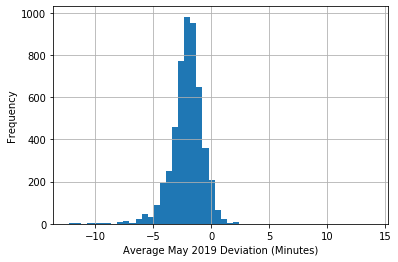

In [13]:
may_2019_ontime_deviation_avg_by_stop_histogram = may_2019_ontime_deviation_avg_by_stop['Deviation (Minutes)'].hist(bins=50)
may_2019_ontime_deviation_avg_by_stop_histogram.set_xlabel("Average May 2019 Deviation (Minutes)")
may_2019_ontime_deviation_avg_by_stop_histogram.set_ylabel("Frequency")

may_2019_ontime_deviation_avg_by_stop_histogram

In [14]:
may_2019_ontime_deviation_avg_by_stop['Deviation (Minutes)'].mean()

-2.0770793324890735

In [15]:
import branca
import branca.colormap as cm

In [16]:
# Define a colormap with blue indicating longest delay, green indicating on time,
# and red indicating a delay from the scheduled time.
# https://github.com/python-visualization/folium/blob/master/examples/Colormaps.ipynb
min_avg_dev_may_2019 = min(may_2019_ontime_deviation_avg_by_stop['Deviation (Minutes)'])
max_avg_dev_may_2019 = max(may_2019_ontime_deviation_avg_by_stop['Deviation (Minutes)'])

linear = cm.LinearColormap(
    ['blue', 'white', 'red'],
    vmin=min_avg_dev_may_2019, vmax=max_avg_dev_may_2019,
    index=[min_avg_dev_may_2019,0,max_avg_dev_may_2019]
)

linear


In [17]:
# Average deviation for each stop
may_2019_ontime_deviation_avg_by_stop_map = folium.Map(
    location=[49.867902, -97.139187],
    tiles='Stamen Toner',
    zoom_start=11
)

for idx, row in may_2019_ontime_deviation_avg_by_stop.iterrows():
    folium.Circle(
        [row['geometry'].x, row['geometry'].y],
        color = linear(row['Deviation (Minutes)']),
        fill_color=linear(row['Deviation (Minutes)']),
        radius=2,
        popup=row['Stop Number'],
    ).add_to(may_2019_ontime_deviation_avg_by_stop_map)

may_2019_ontime_deviation_avg_by_stop_map.save(os.path.join('may_2019_ontime_deviation_avg_by_stop_map.html'))

In [18]:
# Stops with average deviation higher than 5 minutes
may_2019_ontime_deviation_avg_by_stop_gt_5mins = may_2019_ontime_deviation_avg_by_stop[abs(may_2019_ontime_deviation_avg_by_stop['Deviation (Minutes)']) >= 5]
may_2019_ontime_deviation_avg_by_stop_gt_5mins_map = folium.Map(
    location=[49.867902, -97.139187],
    tiles='Stamen Toner',
    zoom_start=11
)

for idx, row in may_2019_ontime_deviation_avg_by_stop_gt_5mins.iterrows():
    folium.Circle(
        [row['geometry'].x, row['geometry'].y],
        color = linear(row['Deviation (Minutes)']),
        fill_color=linear(row['Deviation (Minutes)']),
        radius=2,
        popup=row['Stop Number'],
    ).add_to(may_2019_ontime_deviation_avg_by_stop_gt_5mins_map)

may_2019_ontime_deviation_avg_by_stop_gt_5mins_map.save(os.path.join('may_2019_ontime_deviation_avg_by_stop_gt_5mins_map.html'))

### Average Deviation by Route

In [19]:
may_2019_transit_ontime_data

,Row ID,Stop Number,Route Number,Route Name,Route Destination,Day Type,Scheduled Time,Deviation,Location,Deviation (Minutes)
0,415221142,50534,55,St. Anne's,U of Winnipeg via Dakota,Weekday,2019-05-06 09:45:55,113,POINT (-97.100985959698 49.8516212398491),1.883333
1,415221144,50536,55,St. Anne's,U of Winnipeg via Dakota,Weekday,2019-05-06 09:46:22,105,POINT (-97.1018466864093 49.8527327447882),1.750000
2,415221146,50538,55,St. Anne's,U of Winnipeg via Dakota,Weekday,2019-05-06 09:47:00,71,POINT (-97.1029529643399 49.8543250035057),1.183333
3,415221148,50540,55,St. Anne's,U of Winnipeg via Dakota,Weekday,2019-05-06 09:47:31,85,POINT (-97.1039318827746 49.8556183288162),1.416667
4,415221150,50541,55,St. Anne's,U of Winnipeg via Dakota,Weekday,2019-05-06 09:48:16,88,POINT (-97.1054737483094 49.8574605555685),1.466667
5,415221152,50544,55,St. Anne's,U of Winnipeg via Dakota,Weekday,2019-05-06 09:49:05,88,POINT (-97.1070104597507 49.859437602993),1.466667
6,415221154,50546,55,St. Anne's,U of Winnipeg via Dakota,Weekday,2019-05-06 09:49:38,103,POINT (-97.1080427515696 49.8607947289828),1.716667
7,415221156,50547,55,St. Anne's,U of Winnipeg via Dakota,Weekday,2019-05-06 09:50:05,116,POINT (-97.1089173538657 49.8619153998825),1.933333
8,415221158,50549,55,St. Anne's,U of Winnipeg via Dakota,Weekday,2019-05-06 09:50:38,129,POINT (-97.1099508029985 49.8632455414647),2.150000
9,415221160,50284,55,St. Anne's,U of Winnipeg via Dakota,Weekday,2019-05-06 09:51:00,97,POINT (-97.1105974956756 49.8641465997555),1.616667


In [20]:
may_2019_ontime_deviation_avg_by_route = may_2019_transit_ontime_data.groupby(['Route Number', 'Route Name', 'Route Destination']).mean()[['Deviation', 'Deviation (Minutes)']].reset_index()


In [21]:
may_2019_ontime_deviation_avg_by_route.sort_values('Deviation')

,Route Number,Route Name,Route Destination,Deviation,Deviation (Minutes)
191,59,South St. Anne's Express,Aldgate,-607.368241,-10.122804
197,64,Lindenwoods Express,Lindenwoods,-586.816383,-9.780273
186,57,Southdale Express,Southdale,-583.944247,-9.732404
189,58,Dakota Express,South St. Vital via Paddington,-533.769930,-8.896166
190,58,Dakota Express,South St. Vital via Southglen,-527.812911,-8.796882
123,34,McPhillips Super Express,Maples,-496.540368,-8.275673
261,92,Crossroads Station - Lakeside Meadows,Kildonan Place,-474.171011,-7.902850
70,19,Marion-Logan-Notre Dame,Elizabeth & Drake,-472.248789,-7.870813
192,59,South St. Anne's Express,Island Lakes,-449.437559,-7.490626
140,42,Plessis Express,Lakeside Meadows,-448.566011,-7.476100


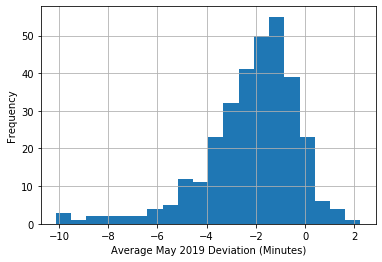

In [22]:
may_2019_ontime_deviation_avg_by_route_histogram = may_2019_ontime_deviation_avg_by_route['Deviation (Minutes)'].hist(bins=20)
may_2019_ontime_deviation_avg_by_route_histogram.set_xlabel("Average May 2019 Deviation (Minutes)")
may_2019_ontime_deviation_avg_by_route_histogram.set_ylabel("Frequency")

may_2019_ontime_deviation_avg_by_route_histogram

In [23]:
may_2019_ontime_deviation_avg_by_route.sort_values('Deviation')

,Route Number,Route Name,Route Destination,Deviation,Deviation (Minutes)
191,59,South St. Anne's Express,Aldgate,-607.368241,-10.122804
197,64,Lindenwoods Express,Lindenwoods,-586.816383,-9.780273
186,57,Southdale Express,Southdale,-583.944247,-9.732404
189,58,Dakota Express,South St. Vital via Paddington,-533.769930,-8.896166
190,58,Dakota Express,South St. Vital via Southglen,-527.812911,-8.796882
123,34,McPhillips Super Express,Maples,-496.540368,-8.275673
261,92,Crossroads Station - Lakeside Meadows,Kildonan Place,-474.171011,-7.902850
70,19,Marion-Logan-Notre Dame,Elizabeth & Drake,-472.248789,-7.870813
192,59,South St. Anne's Express,Island Lakes,-449.437559,-7.490626
140,42,Plessis Express,Lakeside Meadows,-448.566011,-7.476100


In [24]:
top_10_most_delayed_route_destination_tup = zip(may_2019_ontime_deviation_avg_by_route.sort_values('Deviation')[0:10]['Route Number'], may_2019_ontime_deviation_avg_by_route.sort_values('Deviation')[0:10]['Route Name'], may_2019_ontime_deviation_avg_by_route.sort_values('Deviation')[0:10]['Route Destination']) 
top_10_most_delayed_route_destination_list = list(top_10_most_delayed_route_destination_tup)
top_10_most_delayed_route_destination_list = [str(route_num) + ' - ' + route_name + ' - ' + route_dest for route_num, route_name, route_dest in top_10_most_delayed_route_destination_list]
top_10_most_delayed_route_destination_list

["59 - South St. Anne's Express - Aldgate",
 '64 - Lindenwoods Express - Lindenwoods',
 '57 - Southdale Express - Southdale',
 '58 - Dakota Express - South St. Vital via Paddington',
 '58 - Dakota Express - South St. Vital via Southglen',
 '34 - McPhillips Super Express - Maples',
 '92 - Crossroads Station - Lakeside Meadows - Kildonan Place',
 '19 - Marion-Logan-Notre Dame - Elizabeth & Drake',
 "59 - South St. Anne's Express - Island Lakes",
 '42 - Plessis Express - Lakeside Meadows']

In [25]:
may_2019_transit_ontime_data['route_num_dest'] = may_2019_transit_ontime_data['Route Number'].apply(str) + ' - ' + may_2019_transit_ontime_data['Route Name'] + ' - ' + may_2019_transit_ontime_data['Route Destination']
may_2019_top_10_delayed_routes = may_2019_transit_ontime_data[may_2019_transit_ontime_data['route_num_dest'].isin(top_10_most_delayed_route_destination_list)]



In [26]:
may_2019_top_10_delayed_routes

,Row ID,Stop Number,Route Number,Route Name,Route Destination,Day Type,Scheduled Time,Deviation,Location,Deviation (Minutes),route_num_dest
1000,414637043,10579,59,South St. Anne's Express,Island Lakes,Weekday,2019-05-03 15:52:59,-43,POINT (-97.1530992679976 49.8899458146997),-0.716667,59 - South St. Anne's Express - Island Lakes
1001,414637045,10580,59,South St. Anne's Express,Island Lakes,Weekday,2019-05-03 15:54:49,-6,POINT (-97.1496953621673 49.8912137977454),-0.100000,59 - South St. Anne's Express - Island Lakes
1002,414637047,10581,59,South St. Anne's Express,Island Lakes,Weekday,2019-05-03 15:55:58,-55,POINT (-97.1475757967486 49.8920254769237),-0.916667,59 - South St. Anne's Express - Island Lakes
1003,414637049,10582,59,South St. Anne's Express,Island Lakes,Weekday,2019-05-03 15:58:06,-67,POINT (-97.1435788808894 49.8934996836082),-1.116667,59 - South St. Anne's Express - Island Lakes
1004,414637051,10583,59,South St. Anne's Express,Island Lakes,Weekday,2019-05-03 16:00:00,-131,POINT (-97.140047856699 49.8948013290631),-2.183333,59 - South St. Anne's Express - Island Lakes
1005,414637053,10638,59,South St. Anne's Express,Island Lakes,Weekday,2019-05-03 16:01:12,-174,POINT (-97.1380219722604 49.8942560894249),-2.900000,59 - South St. Anne's Express - Island Lakes
1006,414637055,10639,59,South St. Anne's Express,Island Lakes,Weekday,2019-05-03 16:02:40,-214,POINT (-97.1364347462953 49.8913611703308),-3.566667,59 - South St. Anne's Express - Island Lakes
1007,414637057,10641,59,South St. Anne's Express,Island Lakes,Weekday,2019-05-03 16:03:52,-250,POINT (-97.1351764966687 49.8889662470608),-4.166667,59 - South St. Anne's Express - Island Lakes
1008,414637059,10642,59,South St. Anne's Express,Island Lakes,Weekday,2019-05-03 16:04:37,-258,POINT (-97.1343428475961 49.8874776469908),-4.300000,59 - South St. Anne's Express - Island Lakes
1009,414637061,10159,59,South St. Anne's Express,Island Lakes,Weekday,2019-05-03 16:06:27,-238,POINT (-97.1320857492444 49.883915241393),-3.966667,59 - South St. Anne's Express - Island Lakes


In [27]:
may_2019_top_10_delayed_routes_deviation_avg = may_2019_top_10_delayed_routes.groupby(['Route Number', 'Route Name', 'Route Destination', 'Stop Number', 'Location']).mean()[['Deviation', 'Deviation (Minutes)']].reset_index()


In [28]:
may_2019_top_10_delayed_routes_deviation_avg

,Route Number,Route Name,Route Destination,Stop Number,Location,Deviation,Deviation (Minutes)
0,19,Marion-Logan-Notre Dame,Elizabeth & Drake,50042,POINT (-97.0835503867763 49.8710605029608),-168.230769,-2.803846
1,19,Marion-Logan-Notre Dame,Elizabeth & Drake,50044,POINT (-97.0813097064711 49.8710594112908),-176.230769,-2.937179
2,19,Marion-Logan-Notre Dame,Elizabeth & Drake,50053,POINT (-97.0727004708888 49.8653216062657),-204.850000,-3.414167
3,19,Marion-Logan-Notre Dame,Elizabeth & Drake,50054,POINT (-97.0656376879002 49.8651589639329),-211.925000,-3.532083
4,19,Marion-Logan-Notre Dame,Elizabeth & Drake,50056,POINT (-97.0693514711051 49.8652028994314),-201.050000,-3.350833
5,19,Marion-Logan-Notre Dame,Elizabeth & Drake,50060,POINT (-97.0752026071896 49.8653901741196),-196.075000,-3.267917
6,19,Marion-Logan-Notre Dame,Elizabeth & Drake,50063,POINT (-97.0781547566823 49.8656910289555),-191.100000,-3.185000
7,19,Marion-Logan-Notre Dame,Elizabeth & Drake,50064,POINT (-97.0781654312039 49.8668245902195),-183.325000,-3.055417
8,19,Marion-Logan-Notre Dame,Elizabeth & Drake,50065,POINT (-97.0802044488918 49.8673441197425),-185.175000,-3.086250
9,19,Marion-Logan-Notre Dame,Elizabeth & Drake,50067,POINT (-97.0806812820548 49.8693579263959),-166.450000,-2.774167


In [29]:
# Examine stops and average delays for the stop for the most delayed route in May 2019 - route 59 Aldgate
may_2019_top_10_delayed_routes_deviation_avg_route_59 = generate_transit_ontime_geodataframe(may_2019_top_10_delayed_routes_deviation_avg)
may_2019_top_10_delayed_routes_deviation_avg_route_59 = may_2019_top_10_delayed_routes_deviation_avg_route_59[(may_2019_top_10_delayed_routes_deviation_avg_route_59['Route Number'] == 59) & (may_2019_top_10_delayed_routes_deviation_avg_route_59['Route Destination'] == 'Aldgate')]
may_2019_top_10_delayed_routes_deviation_avg_route_59_map = folium.Map(
    location=[49.867902, -97.139187],
    tiles='Stamen Toner',
    zoom_start=11
)

for idx, row in may_2019_top_10_delayed_routes_deviation_avg_route_59.iterrows():
    folium.Circle(
        [row['geometry'].x, row['geometry'].y],
        color = linear(row['Deviation (Minutes)']),
        fill_color=linear(row['Deviation (Minutes)']),
        radius=2,
        popup=row['Stop Number'],
    ).add_to(may_2019_top_10_delayed_routes_deviation_avg_route_59_map)

may_2019_top_10_delayed_routes_deviation_avg_route_59_map.save(os.path.join('may_2019_top_10_delayed_routes_deviation_avg_route_59_map.html'))

In [30]:
def add_route_layer_to_map(mapobj, route_deviation_avg_data, route_number, route_name, route_destination):
    route_deviation_avg_data = generate_transit_ontime_geodataframe(route_deviation_avg_data)
    route_deviation_avg_data = route_deviation_avg_data[(route_deviation_avg_data['Route Number'] == route_number) & (route_deviation_avg_data['Route Name'] == route_name) & (route_deviation_avg_data['Route Destination'] == route_destination)]

    rt_lyr = folium.FeatureGroup(name = str(route_number) + ' - ' + route_name + ' - ' + route_destination)

    for idx, row in route_deviation_avg_data.iterrows():
        popup_html = 'Stop Number: <b>' + str(row['Stop Number']) + '</b></br></br> Average Deviation May 2019 (Minutes): <b>' + str(round(row['Deviation (Minutes)'], 2)) + '</b>'
        iframe = folium.IFrame(html=popup_html, width=500, height=150)
        popup = folium.Popup(iframe, max_width=2650)
        folium.Circle(
            [row['geometry'].x, row['geometry'].y],
            color = linear(row['Deviation (Minutes)']),
            fill_color=linear(row['Deviation (Minutes)']),
            radius=2,
            popup = popup
        ).add_to(rt_lyr)

    mapobj.add_child(rt_lyr)
    return mapobj

In [31]:
# Create layered map to look at the worst stops.
may_2019_top_10_delayed_routes_layered_map = folium.Map(
    location=[49.867902, -97.139187],
    tiles='Stamen Toner',
    zoom_start=11
)

top_10_most_delayed_route_destination_tup = zip(may_2019_ontime_deviation_avg_by_route.sort_values('Deviation')[0:10]['Route Number'], may_2019_ontime_deviation_avg_by_route.sort_values('Deviation')[0:10]['Route Name'], may_2019_ontime_deviation_avg_by_route.sort_values('Deviation')[0:10]['Route Destination']) 

for route_number, route_name, route_destination in top_10_most_delayed_route_destination_tup:
   add_route_layer_to_map(may_2019_top_10_delayed_routes_layered_map, 
                           may_2019_top_10_delayed_routes_deviation_avg, 
                           route_number, 
                           route_name, 
                           route_destination)

# add the layer control
folium.LayerControl().add_to(may_2019_top_10_delayed_routes_layered_map)

    
may_2019_top_10_delayed_routes_layered_map.save(os.path.join('may_2019_top_10_delayed_routes_layered_map.html'))